# Basic Root Locus design

In [8]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, rlocus, step, feedback, lsim, bode
from control import pade

from control_materials import *

source = "/Users/jonathanhow/Dropbox (MIT)/Classes/16.06/Spr_2025/Source/data/"

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found


# Design 9-17

phi_fromG*r2d = -233.13
phi_required*r2d = 53.13
Gczeros = 2.23
Gcpoles = 22.25
Gain = 45.51

Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = 3.482
At possible locations s = -8.901

Found breakin/out at K = 3.401
At possible locations s = -5.563

Found breakin/out at K = -0.000
At possible locations s = 0.000
Closed Loop Poles at: -20.25+0.00j, -1.00+2.00j, -1.00-2.00j


TransferFunction(array([  45.506,  101.266]), array([   1.000,   22.253]))

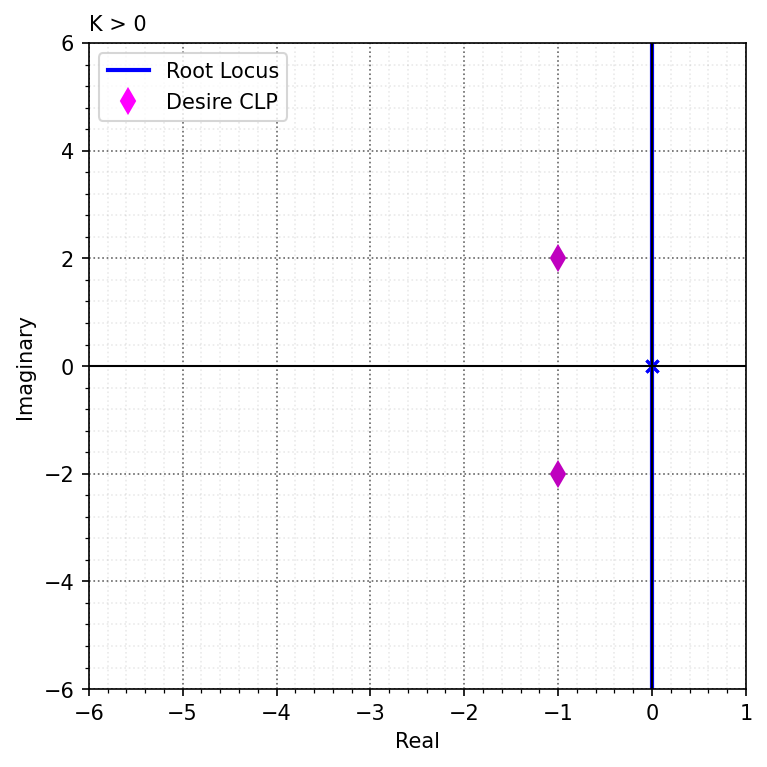

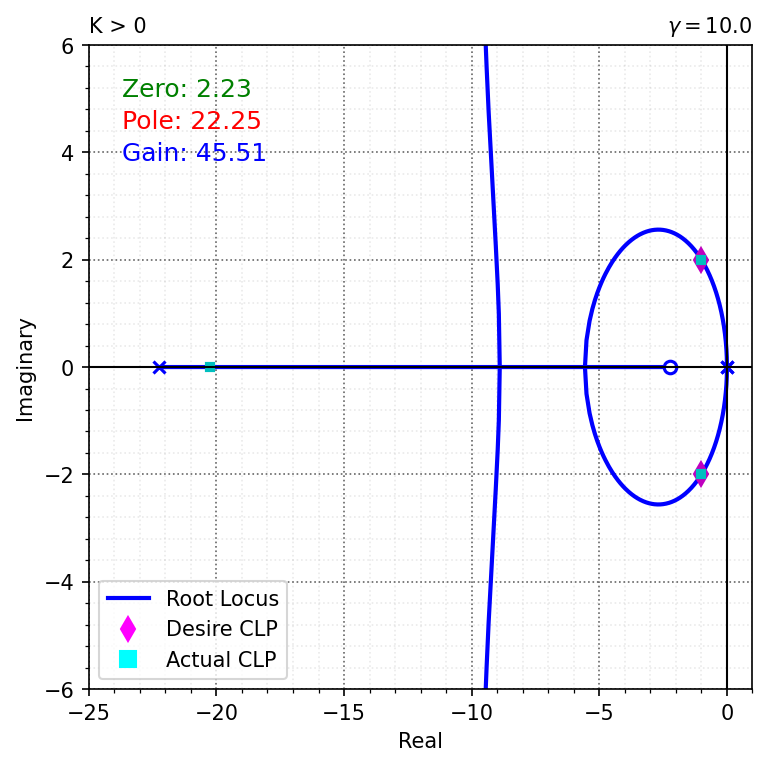

In [9]:
s_target = complex(-1,2)
gamma = 10 # p/z ratio

G = tf((0,1), np.convolve((1,0),(1,0)))
Gc, scl = Root_Locus_design_ratio(G,s_target = s_target, gamma = gamma)
L = G*Gc

fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G),color='b',grid=False,ax=ax)
ax.plot(s_target.real,s_target.imag,'md',ms=8)
ax.plot(s_target.real,-s_target.imag,'md',ms=8)
ax.set_xlim((-6,1))
ax.set_ylim([-6, 6])
plt.xlabel('Real')
plt.ylabel('Imaginary')

# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='magenta', marker='d', markersize=8, linestyle='None'),
]
# Add legend with custom handles
ax.legend(custom_lines, ['Root Locus', 'Desire CLP', ])


nicegrid(ax)
plt.title('K > 0',loc='left')
plt.savefig("./figs/Ex9_17a.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
rlist, klist = rlocus(L, kvect=Root_Locus_gains(L,np.logspace(-3, 1, num=1500)),color='b',grid=False,ax=ax)
ax.plot(s_target.real,s_target.imag,'md',ms=8)
ax.plot(s_target.real,-s_target.imag,'md',ms=8)
ax.plot(scl.real,scl.imag,'cs',ms=4)
ax.plot(scl.real,-scl.imag,'cs',ms=4)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('K > 0',loc='left')
plt.title(r'$\gamma={:3.1f}$'.format(gamma),loc='right')
ax.plot(np.real(-Gc.zeros()), np.imag(-Gc.zeros()), 'go', ms=8, label='Compensator Zero')
ax.plot(np.real(-Gc.poles()), np.imag(-Gc.poles()), 'rx', ms=8, label='Compensator Pole')

ax.text(0.05, 0.95, f'Zero: {np.real(-Gc.zeros())[0]:.2f}', transform=ax.transAxes, fontsize=12, color='green', verticalalignment='top')
ax.text(0.05, 0.90, f'Pole: {np.real(-Gc.poles())[0]:.2f}', transform=ax.transAxes, fontsize=12, color='red', verticalalignment='top')
ax.text(0.05, 0.85, f'Gain: {Gc.num[0][0][0]/Gc.den[0][0][0]:.2f}', transform=ax.transAxes, fontsize=12, color='blue', verticalalignment='top')

ax.set_xlim((-(np.ceil(-np.real(Gc.poles())[0] / 5) * 5), 1))
ax.set_ylim([-6, 6])

# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='magenta', marker='d', markersize=8, linestyle='None'),
    Line2D([0], [0], color='cyan', marker='s', markersize=8, linestyle='None'),
]
# Add legend with custom handles
ax.legend(custom_lines, ['Root Locus', 'Desire CLP', 'Actual CLP', ])

plt.savefig("./figs/Ex9_17.pdf", dpi=600)
nicegrid(ax)
print('Closed Loop Poles at: '+', '.join('{:.2f}'.format(s) for s in scl))
Gc

# Design 9-25

Closed Loop Poles at: -4.00+0.00j, -2.00+2.00j, -2.00-2.00j


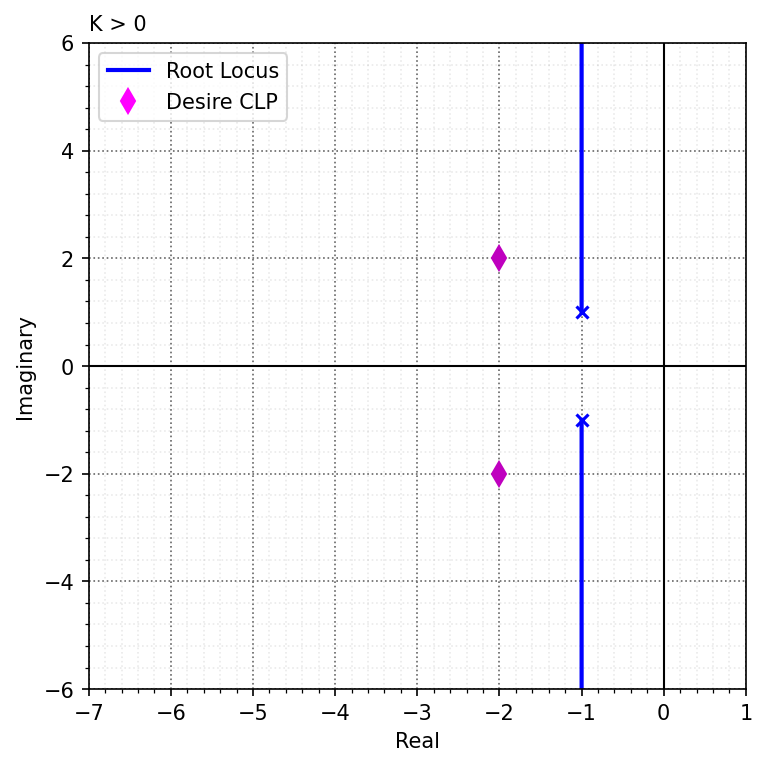

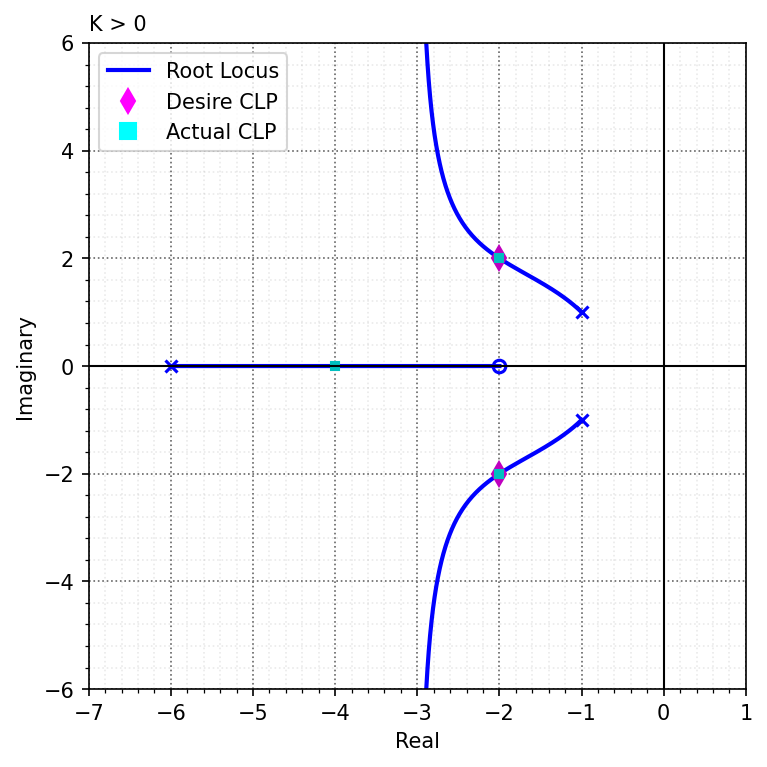

In [15]:
s_target=complex(-2,2)
#
G = tf((0,1), (1,2,2))
Gc, scl = Root_Locus_design_cancel(G,s_cancel = -2, s_target = s_target)
L = G*Gc

fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G),color='b',grid=False,ax=ax)
ax.plot(s_target.real,s_target.imag,'md',ms=8)
ax.plot(s_target.real,-s_target.imag,'md',ms=8)
plt.xlim((-7,1))
ax.set_ylim([-6, 6])
plt.title('K > 0',loc='left')
plt.xlabel('Real')
plt.ylabel('Imaginary')

from matplotlib.lines import Line2D
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='magenta', marker='d', markersize=8, linestyle='None'),
]
# Add legend with custom handles
ax.legend(custom_lines, ['Root Locus', 'Desire CLP', ])

nicegrid(ax)
plt.savefig("./figs/Ex9_23a.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
rlist, klist = rlocus(L, kvect=Root_Locus_gains(L),color='b',grid=False,ax=ax)
ax.plot(s_target.real,s_target.imag,'md',ms=8)
ax.plot(s_target.real,-s_target.imag,'md',ms=8)
ax.plot(scl.real,scl.imag,'cs',ms=4)
plt.xlim((-7,1))
ax.set_ylim([-6, 6])
plt.title('K > 0',loc='left')
plt.xlabel('Real')
plt.ylabel('Imaginary')
nicegrid(ax)
plt.savefig("./figs/Ex9_23.pdf", dpi=600)

# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='magenta', marker='d', markersize=8, linestyle='None'),
    Line2D([0], [0], color='cyan', marker='s', markersize=8, linestyle='None'),
]
# Add legend with custom handles
ax.legend(custom_lines, ['Root Locus', 'Desire CLP', 'Actual CLP', ])
plt.savefig("./figs/Ex9_23.pdf", dpi=600)

print('Closed Loop Poles at: '+', '.join('{:.2f}'.format(s) for s in scl))
Gc

def writefile(filename, Gc):
    with open(filename+"_zero.txt", "w") as f:
        f.write(str(f"{np.real(-Gc.zeros())[0]:4.2f}"))
    with open(filename+"_pole.txt", "w") as f:
        f.write(str(f"{np.real(-Gc.poles())[0]:4.2f}"))
    with open(filename+"_gain.txt", "w") as f:
        gain = Gc.num[0][0]/Gc.den[0][0]
        f.write(str(f"{gain[0]:4.2f}"))
        
writefile(source+"Gc_9_25", Gc)

# Design 9-24

Closed Loop Poles at: -1.00+2.00j, -1.00-2.00j, -0.25+0.00j

Found breakin/out at K = 0.294
At possible locations s = -0.899

Found breakin/out at K = 0.287
At possible locations s = -0.562

Found breakin/out at K = -0.000
At possible locations s = 0.000


TransferFunction(array([   5.494,    1.234]), array([   1.000,    2.247]))

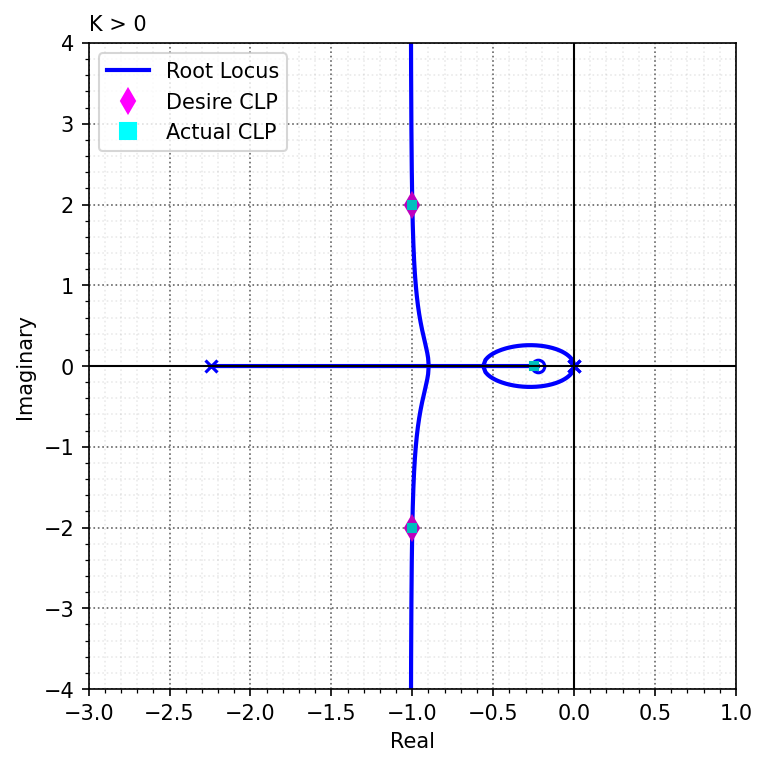

In [11]:
from sympy import symbols
K,alp,z,p = symbols('K alp z p')

#System
G = tf((0,1), (1,0,0))
#Pole Placement
s_targ = complex(-1,2)

gamma = 10
p = gamma*z

# closed-loop char eq will be desired poles and alp, which is unknown
phi_d = np.convolve(np.convolve((1,-s_targ),(1,np.conjugate(-s_targ))),(1,alp))
# form L_den+KL_num to find actual char eq
phi_c = np.convolve(np.squeeze(G.den),[1,p]) + K*np.convolve(np.squeeze(G.num),(0,0,1,z))

# equate the two char eq and solve for the parms of the controller
func = [phi_d[x]-phi_c[x] for x in range(1,4)]
sol = solve(func,(z,alp,K))
sol_z, sol_alp, sol_K = [float(sol[0][x]) for x in range(3)]

Gc = sol_K * tf((1,sol_z), (1,gamma*sol_z))
L = G*Gc
Gcl = feedback(L,1)
scl = Gcl.poles()
print('Closed Loop Poles at: '+', '.join('{:.2f}'.format(s) for s in scl))

fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
rlist, klist = rlocus(L, kvect=Root_Locus_gains(L), color='b', grid=False,ax=ax)
ax.plot(np.real(s_targ),np.imag(s_targ),'md',ms=8)
ax.plot(np.real(s_targ),np.imag(-s_targ),'md',ms=8)
ax.plot(scl.real,scl.imag,'cs',ms=4)
ax.set_xlim([-3, 1]);ax.set_ylim([-4, 4])
nicegrid(ax)
plt.xlabel('Real')
plt.ylabel('Imaginary')
ax.set_title('K > 0',loc='left')

# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='magenta', marker='d', markersize=8, linestyle='None'),
    Line2D([0], [0], color='cyan', marker='s', markersize=8, linestyle='None'),
]
# Add legend with custom handles
ax.legend(custom_lines, ['Root Locus', 'Desire CLP', 'Actual CLP', ])

plt.savefig("./figs/Ex9_24.pdf", dpi=600)

with open(source+"Gc_9_24_zero.txt", "w") as f:
    f.write(str(f"{np.real(-Gc.zeros())[0]:4.2f}"))
with open(source+"Gc_9_24_pole.txt", "w") as f:
    f.write(str(f"{np.real(-Gc.poles())[0]:4.2f}"))
with open(source+"Gc_9_24_gain.txt", "w") as f:
    gain = Gc.num[0][0]/Gc.den[0][0]
    f.write(str(f"{gain[0]:4.2f}"))
    
Gc

# RL design using angles

Closed Loop Poles at: -1.00+2.00j, -1.00-2.00j, -1.00+0.00j

Found breakin/out at K = 0.250
At possible locations s = -0.500

Found breakin/out at K = 0.200
At possible locations s = -1.000

Found breakin/out at K = 0.200
At possible locations s = -1.000

Found breakin/out at K = 0.200
At possible locations s = -1.000


TransferFunction(array([   5.000,    5.000]), array([   1.000,    2.000]))

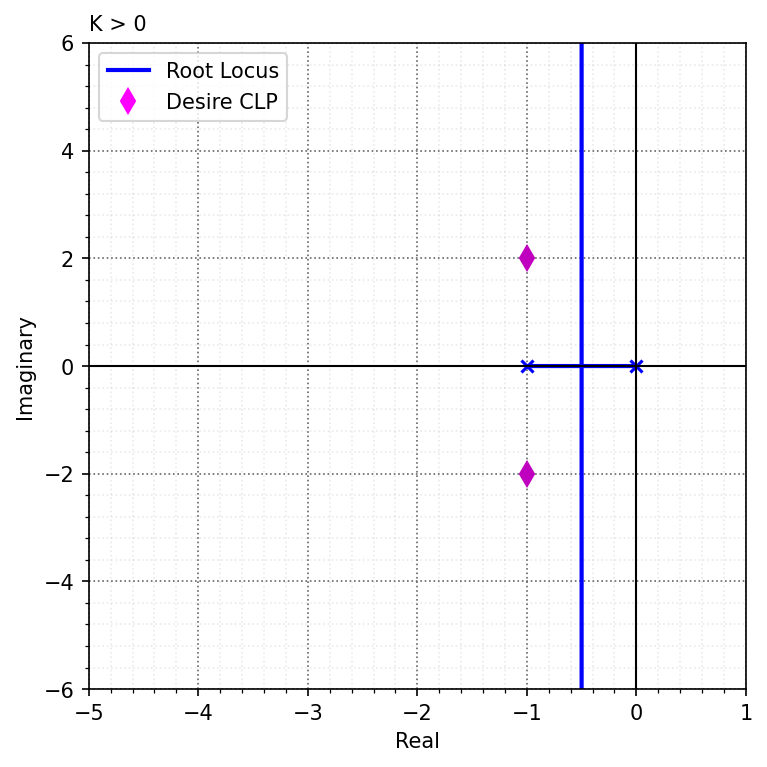

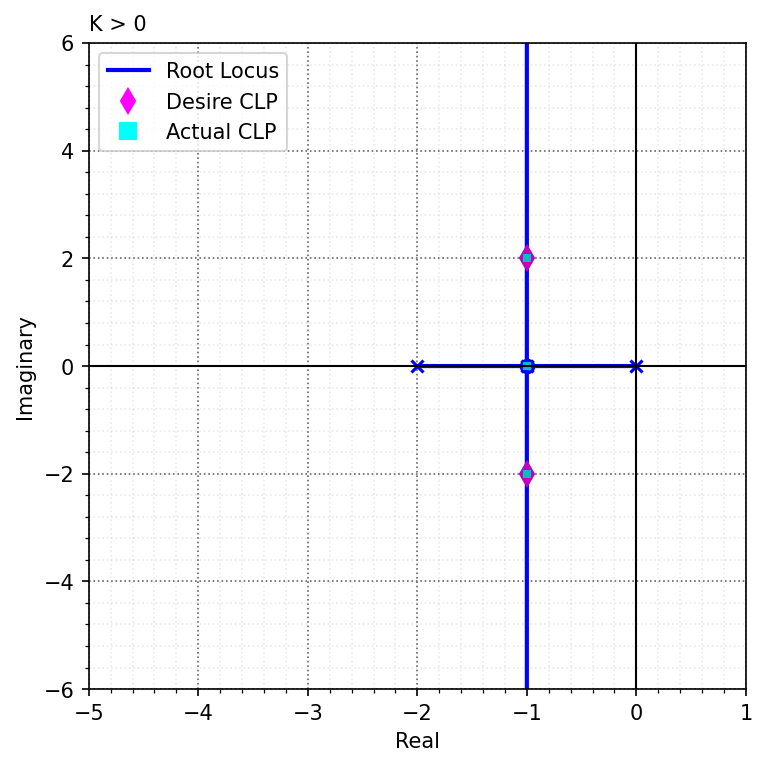

In [16]:
# G_c(s) = K(s+z)/(s+p)

s_target = complex(-1,2)
G = tf((0,1), np.convolve((1,0),(1, 1)))
Gc, scl = Root_Locus_design_cancel(G,s_target = s_target)
L = G*Gc
print('Closed Loop Poles at: '+', '.join('{:.2f}'.format(s) for s in scl))

fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G),color='b',grid=False,ax=ax)
ax.plot(s_target.real,s_target.imag,'md',ms=8,label='Target')
ax.plot(s_target.real,-s_target.imag,'md',ms=8)
ax.set_xlim((-5,1))
ax.set_ylim([-6, 6])
plt.title('K > 0',loc='left')
nicegrid(ax)

# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='magenta', marker='d', markersize=8, linestyle='None'),
]
# Add legend with custom handles
ax.legend(custom_lines, ['Root Locus', 'Desire CLP' ])

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.savefig("./figs/Ex9_18a.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
rlist, klist = rlocus(L, kvect=Root_Locus_gains(L),color='b',grid=False,ax=ax)
ax.plot(s_target.real,s_target.imag,'md',label='Target',ms=8)
ax.plot(s_target.real,-s_target.imag,'md',ms=8)
ax.plot(scl.real,scl.imag,'cs',ms=3,label='closed loop poles')
ax.set_xlim((-5,1))
ax.set_ylim([-6, 6])
plt.title('K > 0',loc='left')
nicegrid(ax)

# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='magenta', marker='d', markersize=8, linestyle='None'),
    Line2D([0], [0], color='cyan', marker='s', markersize=8, linestyle='None'),
]
# Add legend with custom handles
ax.legend(custom_lines, ['Root Locus', 'Desire CLP', 'Actual CLP', ])

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.savefig("./figs/Ex9_18.pdf", dpi=600)

Gc